# Introduction to Scikit Learn using Two Classifiers 
## Michael Rawat

The codes in this notebook closely follows the notebook prepared by previous instructors of BIA 6300-Predictive Models: Myles Gartland, Harlan Hays, Xuan Pham.

The four primary tools for machine learning in Python are Numpy, Matplotlib, Pandas, and Scikit Learn. In fact, we will be using one Python package (Scikit Learn) for most of our work in this course. 

You should have the Scikit Learn documentation bookmarked in your browser for this course. Here is the link:  http://scikit-learn.org/stable/index.html

The discussion below should be familiar to you at a conceptual level since you were introduced to decision tree, knn, classifical model performance metrics, and cross validation in BIA 6301: Applied Data Mining. The difference is that we are using a new tool (Python). 

## Import Standard Packages for Machine Learning

## Import Data Set

In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load anything relating to my machine learning model yet (i.e. decision tree). I will do that as I use them.

In [2]:
%pwd

'C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module1\\code'

In [3]:
cd C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module1\\data

C:\Users\micha\OneDrive\Desktop\Rockhurst University\Classes\BIA 6303 - Predictive Models\Module1\data


In [4]:
bank = pd.read_csv("bank_data.csv", sep = ",") #the sep option is not necessary but always useful to know

In [5]:
bank.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [6]:
bank.tail()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO
599,ID12700,38,26671.60,0,MALE,TOWN,NO,YES,NO,YES,YES,YES


In [7]:
bank.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [8]:
bank.shape #600 rows/observations; 12 columns/variables

(600, 12)

In [9]:
bank.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [10]:
print("Column Names", bank.columns) #Here I am using both the print function (or method) and columns function (or attribute)

Column Names Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')


## Identify Target Variable and Move It to the First Column (Column Number 0 in Python)

In [11]:
# designate target variable name
targetName = 'savings_acct'
#print(targetName)
targetSeries = bank[targetName] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del bank[targetName]
bank.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
bank.head(10)


,savings_acct,id,age,income,children,gender,region,married,car,current_acct,mortgage,pep
0,NO,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,YES
1,NO,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,YES,YES,NO
2,YES,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,NO,NO
3,NO,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,YES,NO,NO
4,YES,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,NO,NO,NO
5,YES,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,NO,YES
6,NO,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,YES,NO,YES
7,YES,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,NO,NO
8,NO,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO
9,YES,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,NO,NO


## Remove Unnecessary Column (ID)

In [12]:
#Note: axis=1 denotes that we are referring to a column, not a row
bank=bank.drop('id',axis=1)
bank.head(10)

,savings_acct,age,income,children,gender,region,married,car,current_acct,mortgage,pep
0,NO,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,YES
1,NO,40,30085.10,3,MALE,TOWN,YES,YES,YES,YES,NO
2,YES,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,NO,NO
3,NO,23,20375.40,3,FEMALE,TOWN,YES,NO,YES,NO,NO
4,YES,57,50576.30,0,FEMALE,RURAL,YES,NO,NO,NO,NO
5,YES,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,NO,YES
6,NO,22,8877.07,0,MALE,RURAL,NO,NO,YES,NO,YES
7,YES,58,24946.60,0,MALE,TOWN,YES,YES,YES,NO,NO
8,NO,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO
9,YES,54,24212.10,2,MALE,TOWN,YES,YES,YES,NO,NO


## Some Exploratory Data Analysis & Data Preprocessing

savings_acct
NO     186
YES    414
Name: savings_acct, dtype: int64


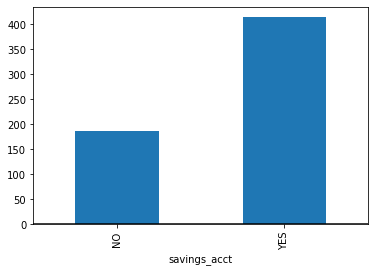

In [13]:
#Basic bar chart since the target is binominal
groupby = bank.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

69% of the customers (414/600) have a saving accounts. If we are going to use a machine learning model, it needs to have better predictive performance than 69%. 

We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables. 

In [14]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
bank['savings_acct'] = le_dep.fit_transform(bank['savings_acct'])

In [15]:
# perform data transformation. Creates dummy variables for categorical variables. 
# very similar to the dummies() function in the dummy package in R
# I did not write this code chunk but cannot find the source to give proper credit to its creator. 
#If you do find the source, please let me know.
for col in bank.columns[1:]:
	attName = col
	dType = bank[col].dtype
	missing = pd.isnull(bank[col]).any()
	uniqueCount = len(bank[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		bank = pd.concat([bank, pd.get_dummies(bank[col], prefix=col)], axis=1)
		del bank[attName]

Now let's look at the revised data frame. There are now 20 columns instead of 12 from earlier. 

In [16]:
bank.shape

(600, 20)

In [17]:
bank.head()

,savings_acct,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
1,0,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
2,1,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
3,0,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
4,1,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [18]:
bank.columns

Index(['savings_acct', 'age', 'income', 'children', 'gender_FEMALE',
       'gender_MALE', 'region_INNER_CITY', 'region_RURAL', 'region_SUBURBAN',
       'region_TOWN', 'married_NO', 'married_YES', 'car_NO', 'car_YES',
       'current_acct_NO', 'current_acct_YES', 'mortgage_NO', 'mortgage_YES',
       'pep_NO', 'pep_YES'],
      dtype='object')

## Train/Test or the Holdout Method

I am using a 60/40 split (60% trainining set and 40% test set). (Note: If you are used to training set and validation set, that's correct as well.) The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". 

In [19]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
features_train, features_test, target_train, target_test = train_test_split(
    bank.iloc[:,1:].values, bank.iloc[:,0].values, test_size=0.40, random_state=0)

In [20]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(240, 19)
(360, 19)
(240,)
(360,)


## Build a Model

In [21]:
#decision tree. Call up my model and name it clf
#clf is a notation used by many people for classifier
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)

DecisionTreeClassifier()


## Train a Model

In [22]:
clf_dt = clf_dt.fit(features_train, target_train)

## Validate a Model

In [23]:
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

In [24]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

DT Accuracy Score 0.5916666666666667
              precision    recall  f1-score   support

           0       0.42      0.31      0.36        87
           1       0.66      0.75      0.70       153

    accuracy                           0.59       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.57      0.59      0.58       240

[[ 27  60]
 [ 38 115]]
True Negatives:  27
False Positives:  60
False Negatives:  38
True Positives:  115


The decision tree classifier's accuracy score is worst than not having a model at all and just going with a naive prediction. But wait a minute, we have an imbalanced data set! We already learned in Applied Data Mining that accuracy may not always be the best performance metric to use. Okay, so what else can we look at?
   

You should have previously been introduced to performance metrics such as sensitivity and specificity rates. Now let's add in a few more:

1. Precision: How often is the classifier correct with its positive predictions? Precision = True Positives/(True Positives + False Positives). 
2. Recall: How well does the classifier predict positive cases? Recall = True Positives/(True Positives + False Negatives). Yes, recall is the same as the sensitivity rate. 

Our classifier correctly identifies 80% of the customers that actually have savings account (recall); however, the classifier is only 67% correct when it predicts a customer has a savings account (precision).

So why does this matter? In some scenarios, we want our classifier to catch a wide net and get as many actual positive cases as possible (high recall). In other scenarios, we want our classifier to be really good at making correct positive predictions. Here are some great readings on this topic:

https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9 


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Of course, we ideally want a classifier that has good precision and recall. So how do you balance both precision and recall? We can try to maximize the f1 score. The f1 score is the harmonic mean of precision and recall.
f1 = 2 * (precision * recall)/(precision + recall).

For more on the classification_report and confusion_matrix functions (or methods) in scikit learn, check out this documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix. 

### A More Robust Approach than Holdout Method: k-fold Cross Validation

In [25]:
#verify DT with 10-fold cross validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()         

Cross Validation Score for each K [0.66666667 0.77777778 0.69444444 0.66666667 0.80555556 0.63888889
 0.69444444 0.63888889 0.72222222 0.75      ]


0.7055555555555555

The accuracy rate is reported for each test fold. An average for all ten iterations is also reported. Overall, our classifier is 67.5% accurate. That's still worst than not having a decision tree model at all.

Here is the documentation on cross validation in scikit learn: https://scikit-learn.org/stable/modules/cross_validation.html

### Visualizing the Trained Model

To do the next task, you will need to install additional packages outside of the Jupyter notebook. 

Instructions for MAC users:

From your machine's Start menu, type "anaconda prompt." Now type the following into the Anaconda Prompt:

conda install graphviz

Wait for this installation to complete. Type in the following line:

pip install pydotplus


Instructions for Windows users:

Go here to download the stable release of GraphViz: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
Now watch this video tutorial: https://youtu.be/z-AGmGmR6Z8

In [26]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)
#Add feature names

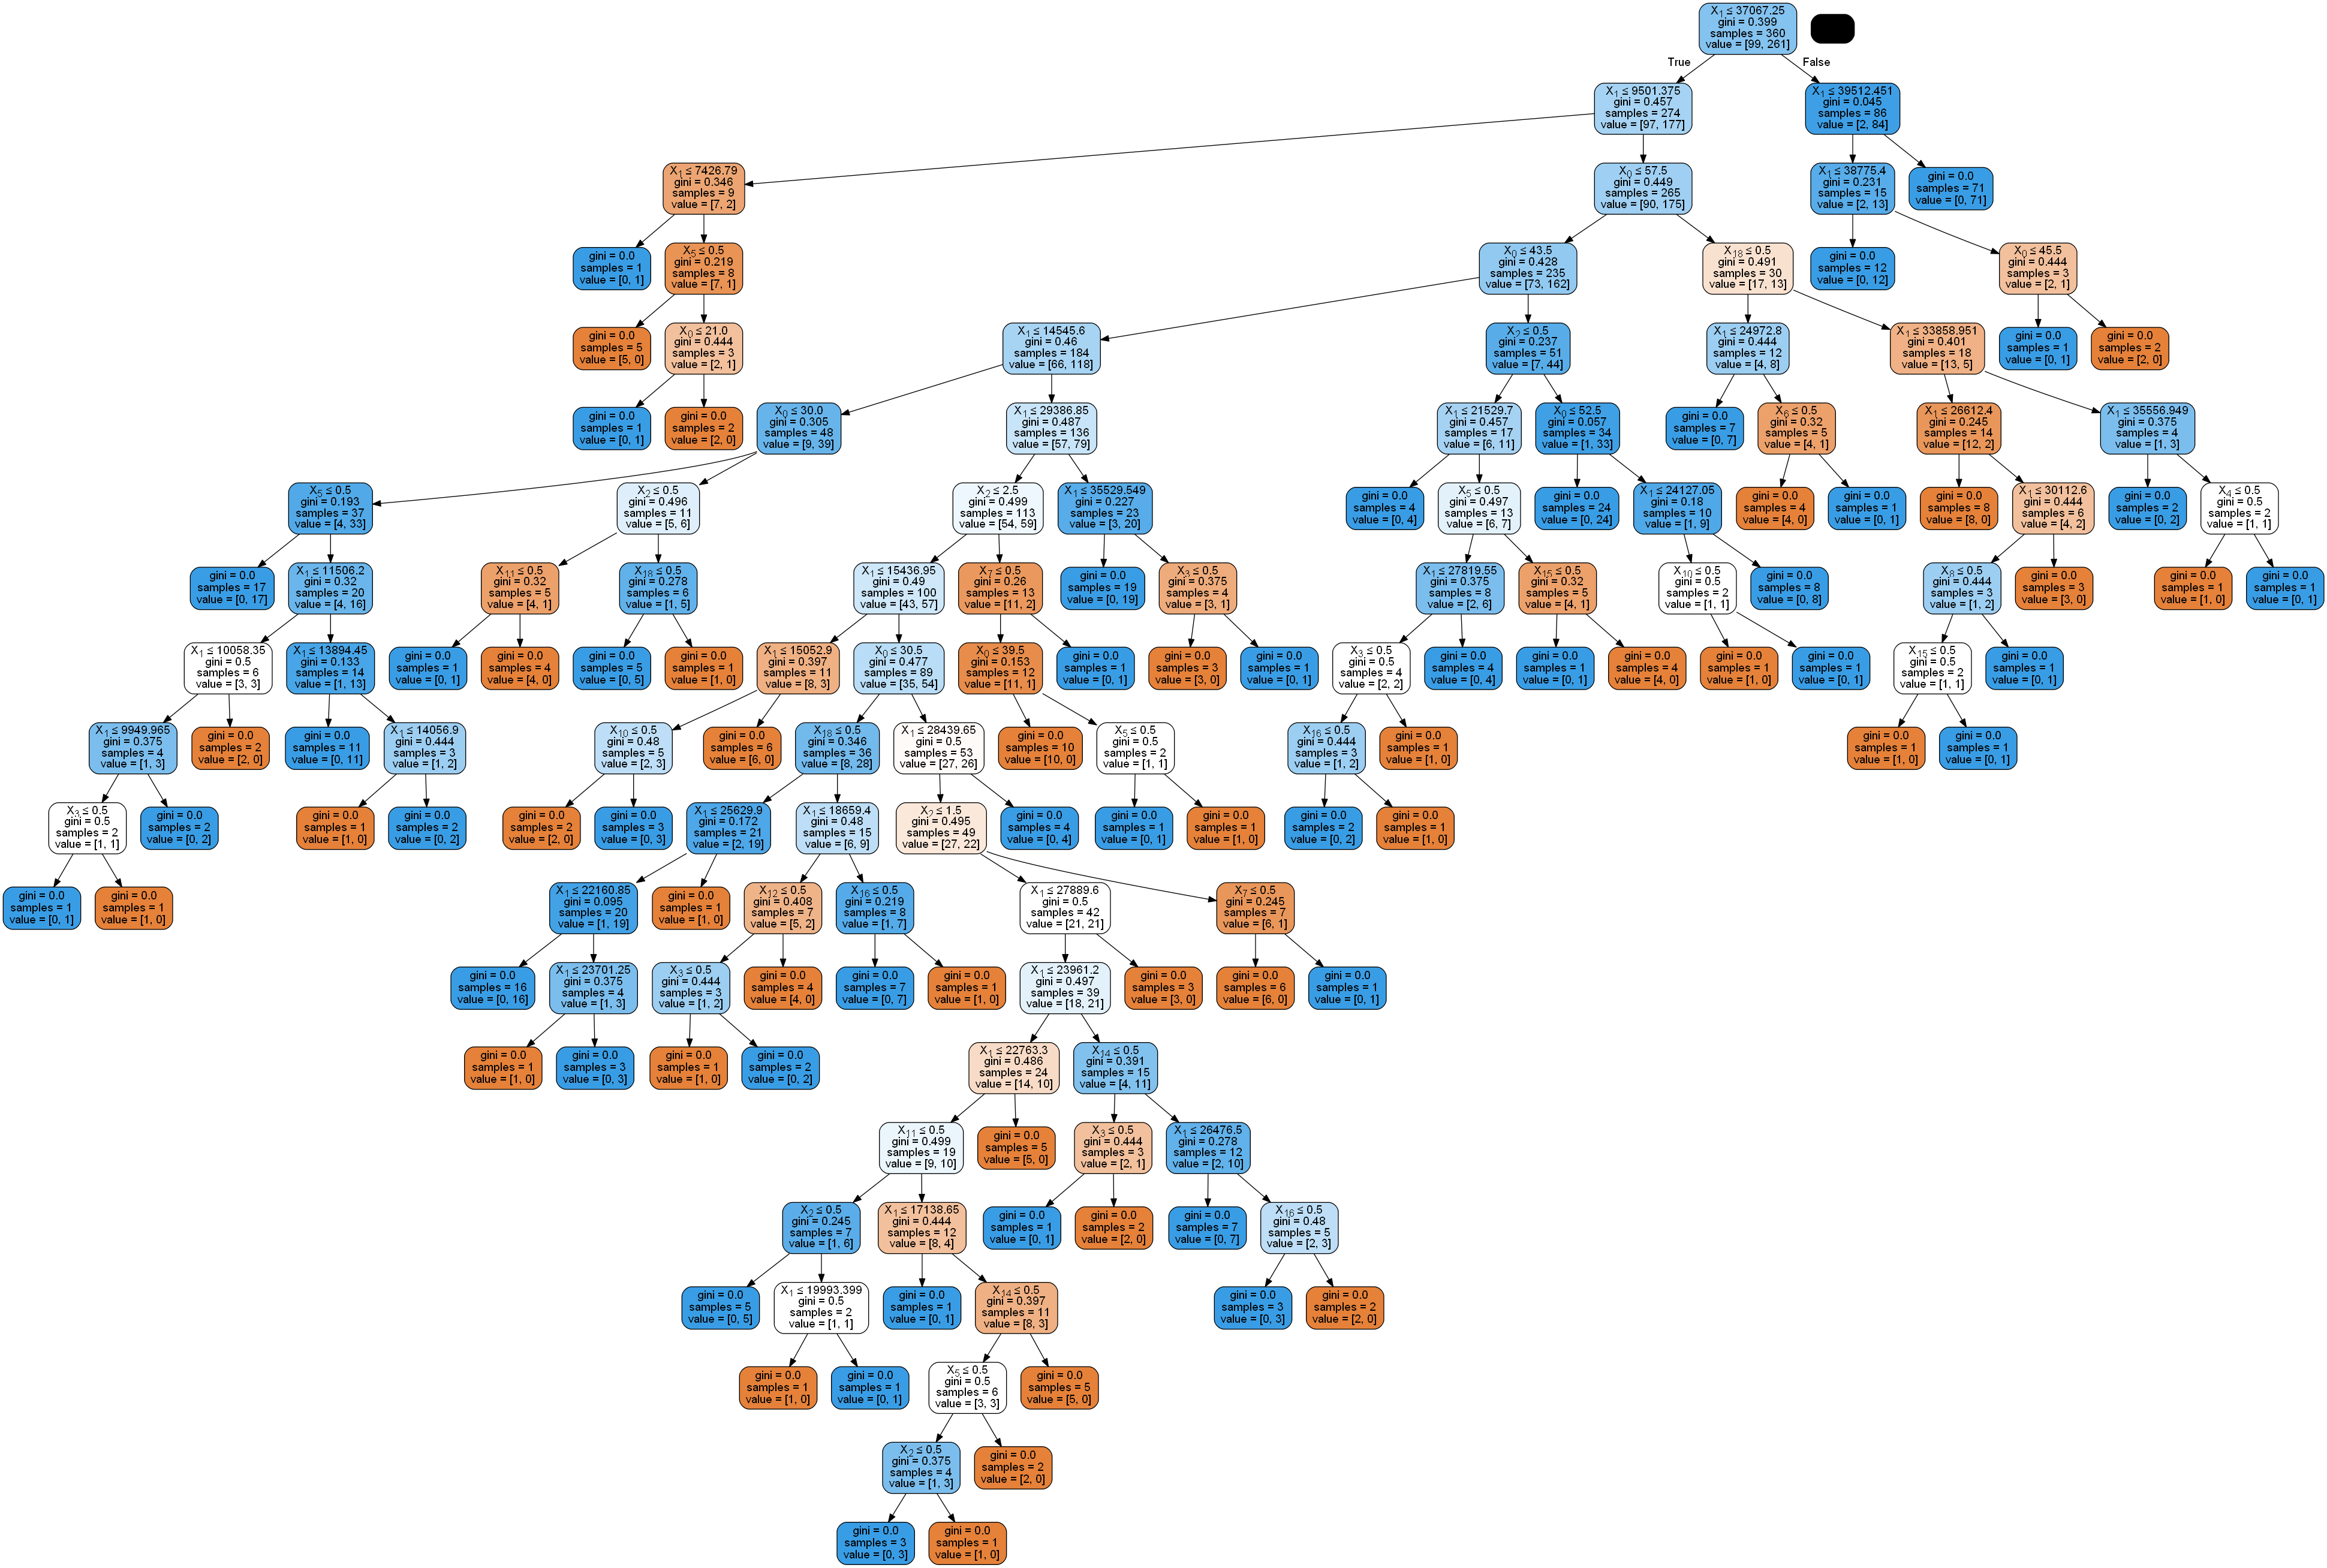

In [27]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

A side comment: You are probably wondering why do we use conda install for one package but pip install for another package? Great question! Take a look at this discussion from the Anaconda blog: https://www.anaconda.com/blog/understanding-conda-and-pip

How would we prune the decision tree above? We have to go back to our code and change the classifier's max_depth to some other value. We can also "tune" the model by changing other options as well.

### Rinse & Repeat the Process: Build, Train, and Validate

In [28]:
#Build
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
knn = KNeighborsClassifier()
#call up the model to see the parameters you can tune (and their default settings)
print(knn)
print(scaler)

from sklearn.pipeline import make_pipeline
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

KNeighborsClassifier()
<class 'sklearn.preprocessing._data.StandardScaler'>


Here's the documentation for knn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

In [29]:
#Train
clf_knn = clf_knn.fit(features_train, target_train)

In [30]:
#Validate
target_predicted_knn = clf_knn.predict(features_test)

In [31]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

KNN Accuracy Score 0.6041666666666666
              precision    recall  f1-score   support

           0       0.39      0.17      0.24        87
           1       0.64      0.85      0.73       153

    accuracy                           0.60       240
   macro avg       0.52      0.51      0.49       240
weighted avg       0.55      0.60      0.55       240

[[ 15  72]
 [ 23 130]]
True Negatives:  15
False Positives:  72
False Negatives:  23
True Positives:  130


How does knn=5 classifier stack up against the decision tree classifier?

In your homework assignment, you will be asked to prepare a notebook similar to this one. An additional requirement is to run a different classifier of your choice (Example: logistic regression, random forest, etc.). Be sure to check the Scikit Learn documentation for implementation examples. 